##### **<font color='purple'>Image Processing Assignment: Exploring Lena</font>**
##### **<font color='purple'>Student Name: Lina Abureesh</font>**
##### **<font color='purple'>University ID: 1211985</font>**

#### Import Libraries

In [1]:
import numpy as np 
import cv2 as  cv
import matplotlib.pyplot as plt
import seaborn as sns
import copy

#### Load the image

In [2]:
image = cv.imread('lena.jpg')
image

array([[[126, 136, 223],
        [128, 138, 225],
        [128, 138, 226],
        ...,
        [120, 144, 232],
        [104, 131, 218],
        [ 79, 106, 193]],

       [[126, 136, 223],
        [128, 138, 225],
        [127, 137, 225],
        ...,
        [123, 145, 233],
        [109, 131, 219],
        [ 81, 105, 193]],

       [[125, 137, 225],
        [126, 138, 226],
        [125, 137, 225],
        ...,
        [125, 143, 232],
        [111, 129, 218],
        [ 83, 101, 190]],

       ...,

       [[ 58,  21,  85],
        [ 53,  18,  82],
        [ 65,  30,  94],
        ...,
        [ 81,  70, 174],
        [ 77,  66, 176],
        [ 75,  66, 176]],

       [[ 58,  21,  83],
        [ 54,  20,  81],
        [ 69,  34,  98],
        ...,
        [ 83,  71, 177],
        [ 81,  72, 183],
        [ 79,  72, 183]],

       [[ 60,  23,  85],
        [ 55,  21,  82],
        [ 69,  34,  98],
        ...,
        [ 79,  69, 176],
        [ 82,  73, 184],
        [ 80,  72, 186]]

In [3]:
image.shape

(512, 512, 3)

###### <font color='red'>_Note 1: The image is represented by a 3-dimensional array of shape (512, 512, 3), meaning that it has a size of 512 * 512 pixels and each pixel has three values for blue, green and red channels which the third dimension represents._</font>  

###### <font color='red'>_Note 2: The image is loaded as it is in bgr scale, meaning that the intsensity values in the array represent the blue, green and red values respectively, so it is better to convert it into rgb before performing any operation on it._</font>  

In [4]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#### Show the image:

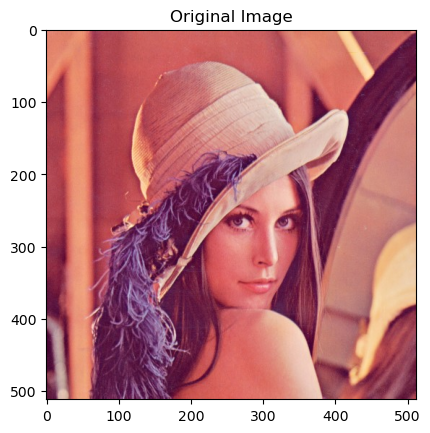

In [5]:
plt.imshow(image);
plt.title("Original Image")
plt.show()

#### Image Processing Operations:

##### 1- Color to Grayscale & Binary Convnersion:

* ##### <font color='green'>grayscale: </font>

In [6]:
gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
gray_img

array([[143, 145, 145, ..., 147, 133, 108],
       [143, 145, 144, ..., 148, 134, 108],
       [143, 144, 143, ..., 148, 134, 106],
       ...,
       [ 39,  36,  48, ...,  85,  82,  81],
       [ 39,  37,  52, ...,  87,  87,  87],
       [ 41,  38,  52, ...,  84,  88,  87]], dtype=uint8)

In [7]:
gray_img.shape

(512, 512)

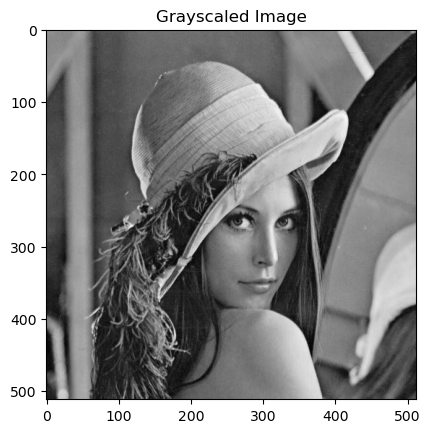

In [8]:
# plot the grayscale image
plt.imshow(gray_img, cmap='gray');
plt.title('Grayscaled Image')
plt.show()

In [9]:
# save the grayscale image
cv.imwrite('image_in_gray.jpg', gray_img)

True

* ##### <font color='green'>Binary:</font>

In [10]:
# this functoin converts a colorfull rgb image into a binary image  
def rgb_to_binary(image, threshold):
    binary_img = np.zeros((image.shape[0], image.shape[1]))
    maxval = 255
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            binary_img[i][j] = (maxval if image[i][j][0] >= threshold or image[i][j][1] >= threshold or image[i][j][2] >= threshold else 0)
    return binary_img

In [11]:
binary_img = rgb_to_binary(image, 175)
binary_img

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [  0.,   0.,   0., ...,   0., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.]])

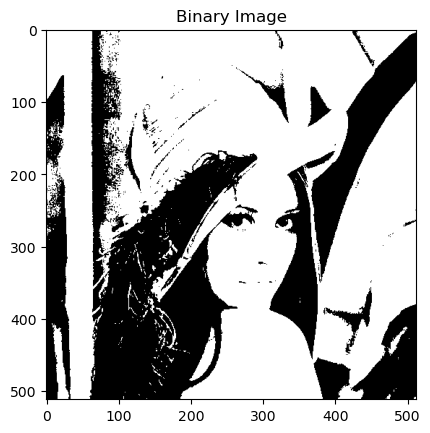

In [12]:
# plot the binary image
plt.imshow(binary_img, cmap='gray');
plt.title('Binary Image')
plt.show()

In [13]:
# save the binary image
cv.imwrite('binary_image.jpg', binary_img)

True

##### 2- Downscaling:

In [14]:
# this function computes the mean for a list of values
def compute_int_mean(*nums):
    count = 0
    sum = 0
    for i in range(len(nums)):
        sum=sum+nums[i]
        count=count+1
    return int(sum/count)

In [15]:
# this function takes a gray_scale image and downscales it to a new image with half number of pixels in a row and column
def downscale(img, row_pixels, column_pixels):
    downscaled = np.zeros((row_pixels, row_pixels))
    row = 0
    for i in range(downscaled.shape[0]):
        column = 0
        for j in range(downscaled.shape[1]):
            downscaled[i][j] = compute_int_mean(img[row][column], img[row][column+1], img[row+1][column], img[row+1][column+1])
            column=column+2
        row=row+2
    return downscaled

In [16]:
downscaled_img = downscale(gray_img, 256, 256)
downscaled_img

array([[144., 143., 141., ..., 149., 149., 120.],
       [143., 141., 141., ..., 149., 149., 122.],
       [143., 139., 140., ..., 141., 134., 100.],
       ...,
       [ 45.,  46.,  47., ...,  69.,  77.,  75.],
       [ 39.,  43.,  44., ...,  78.,  85.,  80.],
       [ 38.,  47.,  45., ...,  86.,  85.,  87.]])

In [17]:
downscaled_img.shape

(256, 256)

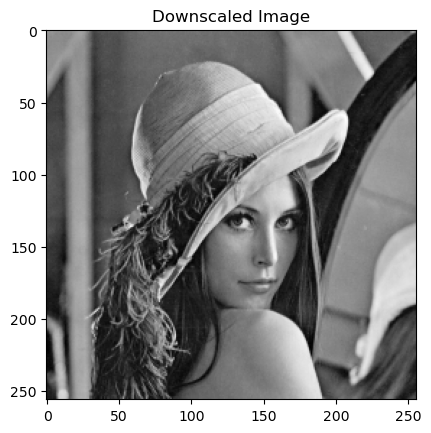

In [18]:
# plot the downsclaed image
plt.imshow(downscaled_img, cmap='gray');
plt.title('Downscaled Image')
plt.show()

In [19]:
# save the downscaled image
cv.imwrite('downscaled_lena.jpg', downscaled_img)

True

##### 3- Image Analysis:

* ##### <font color='blue'>Compute the Mean: </font>

In [20]:
def image_mean(img):
    count = 0
    sum = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum = sum + img[i][j]
            count = count + 1
    return sum / count

In [21]:
print(f'The downscaled image mean = {image_mean(downscaled_img)}')
print((f'The downscaled image mean = {downscaled_img.mean()}'))

The downscaled image mean = 109.8128662109375
The downscaled image mean = 109.8128662109375


In [22]:
print(f'The original gray image mean = {image_mean(gray_img)}')
print((f'The gray image mean = {gray_img.mean()}'))

The original gray image mean = 110.18572616577148
The gray image mean = 110.18572616577148


* ##### <font color='blue'>Compute the Standard Deviation: </font>

In [23]:
def image_std(img):
    mean = image_mean(img)
    count = 0
    sum = 0 
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sqr_diff = (img[i][j] - mean)**2
            sum += sqr_diff
            count += 1
    return (sum / count)**0.5

In [24]:
print(f'The downscaled image standard deviation = {image_std(downscaled_img)}')
print(f'The downscaled image standard deviation = {downscaled_img.std()}')

The downscaled image standard deviation = 44.81477671373609
The downscaled image standard deviation = 44.81477671373609


* ##### <font color='blue'>Compute the Histogram: </font>

In [25]:
def compute_hist(img):
    hist = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[int(img[i][j])] += 1
    return hist

In [26]:
histogram = compute_hist(downscaled_img)
histogram

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,   3.,   5.,   8.,  12.,  23.,  41.,  45.,  61.,  97., 105.,
       180., 213., 228., 259., 415., 482., 478., 511., 554., 613., 645.,
       560., 601., 566., 551., 528., 476., 425., 346., 326., 301., 275.,
       287., 270., 291., 279., 276., 281., 290., 264., 299., 281., 279.,
       284., 270., 275., 295., 276., 288., 298., 315., 327., 339., 409.,
       398., 486., 487., 607., 620., 600., 551., 562., 497., 480., 466.,
       409., 440., 390., 414., 386., 380., 379., 399., 411., 388., 437.,
       416., 439., 446., 498., 561., 530., 630., 595., 626., 651., 607.,
       611., 549., 479., 436., 453., 465., 462., 537., 502., 603., 521.,
       574., 537., 528., 487., 487., 524., 470., 529., 541., 578., 565.,
       657., 622., 639., 650., 619., 610., 659., 658., 624., 586., 553.,
       529., 426., 410., 409., 368., 381., 348., 33

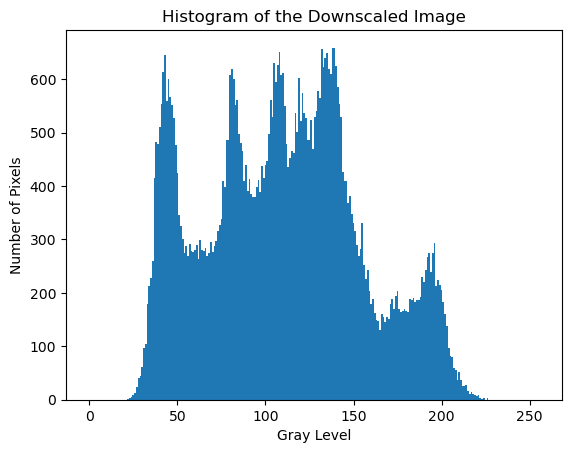

In [27]:
plt.bar(np.arange(256), histogram, width=1)
plt.xlabel("Gray Level")
plt.ylabel("Number of Pixels")
plt.title("Histogram of the Downscaled Image")
plt.show()

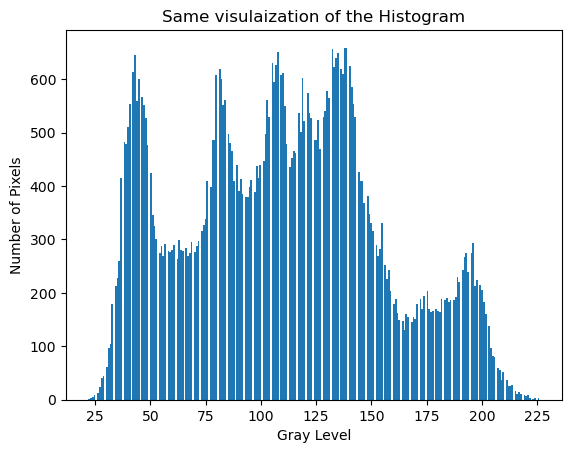

In [28]:
reshaped = downscaled_img.reshape(-1,)
plt.hist(reshaped, bins=256);
plt.title('Same visulaization of the Histogram')
plt.xlabel('Gray Level')
plt.ylabel('Number of Pixels')
plt.show()

* ##### <font color='blue'>Compute the Normalized Histogram: </font>

In [29]:
def compute_norm_hist(img):
    hist = compute_hist(img)
    return hist/hist.sum()

In [30]:
norm_hist = compute_norm_hist(downscaled_img)
norm_hist

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.52587891e-05, 4.57763672e-05,
       7.62939453e-05, 1.22070312e-04, 1.83105469e-04, 3.50952148e-04,
       6.25610352e-04, 6.86645508e-04, 9.30786133e-04, 1.48010254e-03,
       1.60217285e-03, 2.74658203e-03, 3.25012207e-03, 3.47900391e-03,
       3.95202637e-03, 6.33239746e-03, 7.35473633e-03, 7.29370117e-03,
       7.79724121e-03, 8.45336914e-03, 9.35363770e-03, 9.84191895e-03,
       8.54492188e-03, 9.17053223e-03, 8.63647461e-03, 8.40759277e-03,
       8.05664062e-03, 7.26318359e-03, 6.48498535e-03, 5.27954102e-03,
       4.97436523e-03, 4.59289551e-03, 4.19616699e-03, 4.37927246e-03,
      

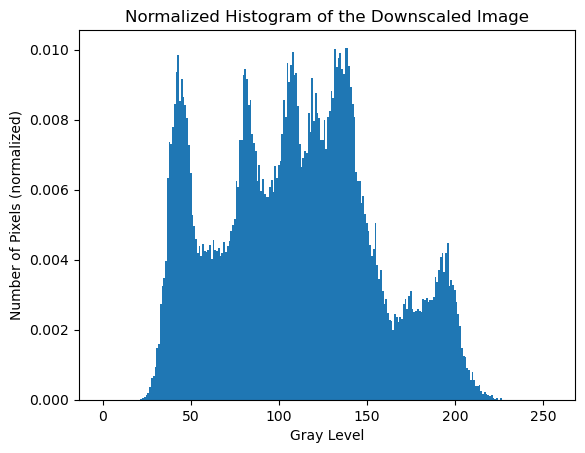

In [31]:
plt.bar(np.arange(256), norm_hist, width=1)
plt.xlabel("Gray Level")
plt.ylabel("Number of Pixels (normalized)")
plt.title("Normalized Histogram of the Downscaled Image")
plt.show()

* ##### <font color='blue'>Compute the Cumulative Histogram: </font>

In [32]:
def compute_cum_hist(img):
    cum = 0
    norm_hist = compute_norm_hist(img)
    cum_hist = copy.deepcopy(norm_hist) 
    for i in range(cum_hist.shape[0]):
        cum_hist[i] = cum_hist[i] + cum
        cum = cum_hist[i]
    return cum_hist

In [33]:
cum_hist = compute_cum_hist(downscaled_img)
cum_hist

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.52587891e-05, 6.10351562e-05,
       1.37329102e-04, 2.59399414e-04, 4.42504883e-04, 7.93457031e-04,
       1.41906738e-03, 2.10571289e-03, 3.03649902e-03, 4.51660156e-03,
       6.11877441e-03, 8.86535645e-03, 1.21154785e-02, 1.55944824e-02,
       1.95465088e-02, 2.58789062e-02, 3.32336426e-02, 4.05273438e-02,
       4.83245850e-02, 5.67779541e-02, 6.61315918e-02, 7.59735107e-02,
       8.45184326e-02, 9.36889648e-02, 1.02325439e-01, 1.10733032e-01,
       1.18789673e-01, 1.26052856e-01, 1.32537842e-01, 1.37817383e-01,
       1.42791748e-01, 1.47384644e-01, 1.51580811e-01, 1.55960083e-01,
      

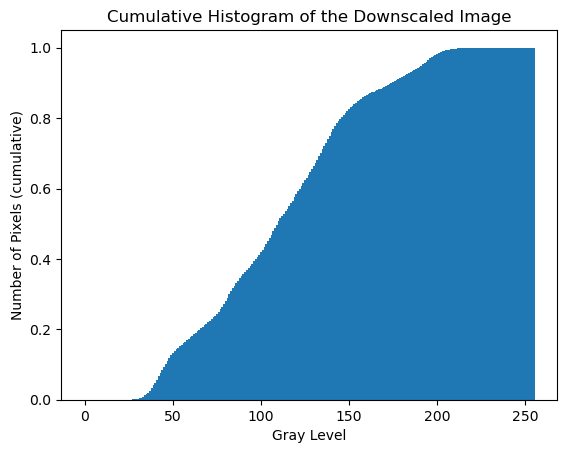

In [34]:
plt.bar(np.arange(256), cum_hist, width=1)
plt.xlabel("Gray Level")
plt.ylabel("Number of Pixels (cumulative)")
plt.title("Cumulative Histogram of the Downscaled Image")
plt.show()

* ##### <font color='blue'>Compute the Entropy: </font>

In [35]:
def compute_entropy(img):
    norm = compute_norm_hist(img)
    log_norm = np.log2(norm+0.00000000000000001) # a very tiny value is added to the normalized histogram to avoid errors when applying the log function
    entropy = -np.sum(norm*log_norm)
    return entropy

In [36]:
entropy = compute_entropy(downscaled_img)
print(f'The downscaled image entropy = {entropy}')

The downscaled image entropy = 7.359455503785042


##### 4- Contrast Enhancement:

In [37]:
alpha = 1.5
beta = -10
enhanced_img = copy.deepcopy(downscaled_img)
for i in range(downscaled_img.shape[0]):
    for j in range(downscaled_img.shape[1]):
        enhanced_img[i][j] = downscaled_img[i][j] * alpha + beta

In [38]:
cv.imwrite('C.jpg', enhanced_img)

True

In [39]:
enhanced_img

array([[206. , 204.5, 201.5, ..., 213.5, 213.5, 170. ],
       [204.5, 201.5, 201.5, ..., 213.5, 213.5, 173. ],
       [204.5, 198.5, 200. , ..., 201.5, 191. , 140. ],
       ...,
       [ 57.5,  59. ,  60.5, ...,  93.5, 105.5, 102.5],
       [ 48.5,  54.5,  56. , ..., 107. , 117.5, 110. ],
       [ 47. ,  60.5,  57.5, ..., 119. , 117.5, 120.5]])

##### 5- Flipping and Blurring:

* ##### <font color='blue'>Flipping the image: </font>

In [40]:
def flip_horizontal(img):
    rows, cols = img.shape
    flipped = np.zeros_like(img)
    for i in range(rows):
        for j in range(cols):
            flipped[i][j] = img[i][rows - j - 1]
    return flipped

In [41]:
flipped_img = flip_horizontal(downscaled_img)

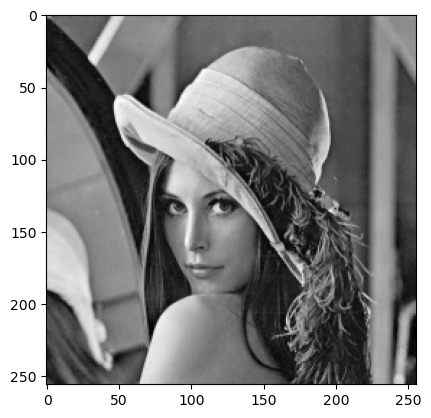

In [42]:
plt.imshow(flipped_img, cmap='gray')

In [43]:
# save the grayscale image
cv.imwrite('flipped.jpg', flipped_img)

True

* ##### <font color='blue'>Blurring the image: </font>

In [44]:
def blurring(img):
    padded = np.zeros((img.shape[0] + 2, img.shape[1] + 2))
    blurred = np.zeros_like(img)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            padded[i][j] = img[i-1][j-1]
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
           #blurred[i][j] = compute_int_mean(padded[i][j], padded[i][j-1], padded[i][j+1], padded[i-1][j], padded[i+1][j], padded[i-1][j-1], padded[i-1][j+1], padded[i+1][j-1], padded[i+1][j+1])
            blurred[i][j] = compute_avg(i, j, img)
    return blurred

In [45]:
def compute_avg(i,j, img):
    sum = 0 
    sum += img[i][j] * 4
    sum += img[i][j-1] * 2
    sum += img[i][j+1] * 2
    sum += img[i-1][j] * 2
    sum += img[i+1][j] * 2
    sum += img[i+1][j+1] + img[i-1][j-1] + img[i-1][j+1] + img[i+1][j-1]
    return int(sum/16)

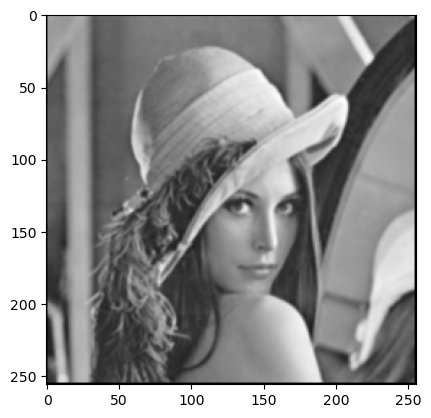

In [46]:
blurred_img = blurring(downscaled_img)
plt.imshow(blurred_img, cmap='gray')

In [47]:
# save the grayscale image
cv.imwrite('blurred.jpg', blurred_img)

True

##### 6- Negative Image:

In [48]:
negative_img = 255 - downscaled_img
negative_img

array([[111., 112., 114., ..., 106., 106., 135.],
       [112., 114., 114., ..., 106., 106., 133.],
       [112., 116., 115., ..., 114., 121., 155.],
       ...,
       [210., 209., 208., ..., 186., 178., 180.],
       [216., 212., 211., ..., 177., 170., 175.],
       [217., 208., 210., ..., 169., 170., 168.]])

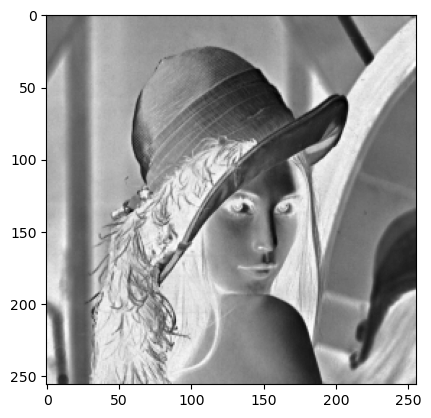

In [49]:
plt.imshow(negative_img, cmap='gray')

In [50]:
# save the image
cv.imwrite('negative.jpg', negative_img)

True

##### 7- Custom Crop Function:

In [51]:
def crop(img, x, y, w, h):
    cropped = np.zeros((h, w))
    row = 0
    for i in range(x, x + h):
        col = 0 
        for j in range(y, y + w):
            cropped[row][col] = img[i][j]
            col += 1
        row += 1 
    return cropped

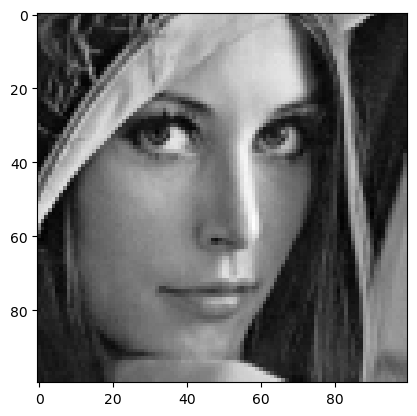

In [52]:
cropped = crop(downscaled_img, 100, 100, 100, 100)
plt.imshow(cropped, cmap='gray');

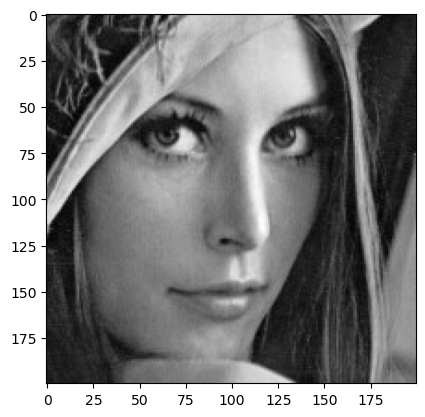

In [53]:
cropped_2 = crop(gray_img, 200, 200, 200, 200)
plt.imshow(cropped_2, cmap='gray')

##### 8- Histogram-based Search:

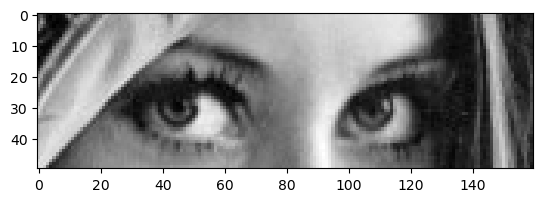

In [54]:
slice = crop(gray_img, 235, 220, 160, 50)
plt.imshow(slice, cmap='gray')

In [55]:
def hist_based_search(slice, img):
    slice_hist = compute_hist(slice)
    for i in range(100):
        for j in range(100):
            img_slice =  crop(img, i, j, slice.shape[1], slice.shape[0])
            hist2 = compute_hist(img_slice)
            if np.sum(slice_hist == hist2) == 256:
                print("found!")

In [56]:
slice_hist = compute_hist(slice)
np.sum(slice_hist == slice_hist)

256

In [ ]:
hist_based_search(slice, gray_img)